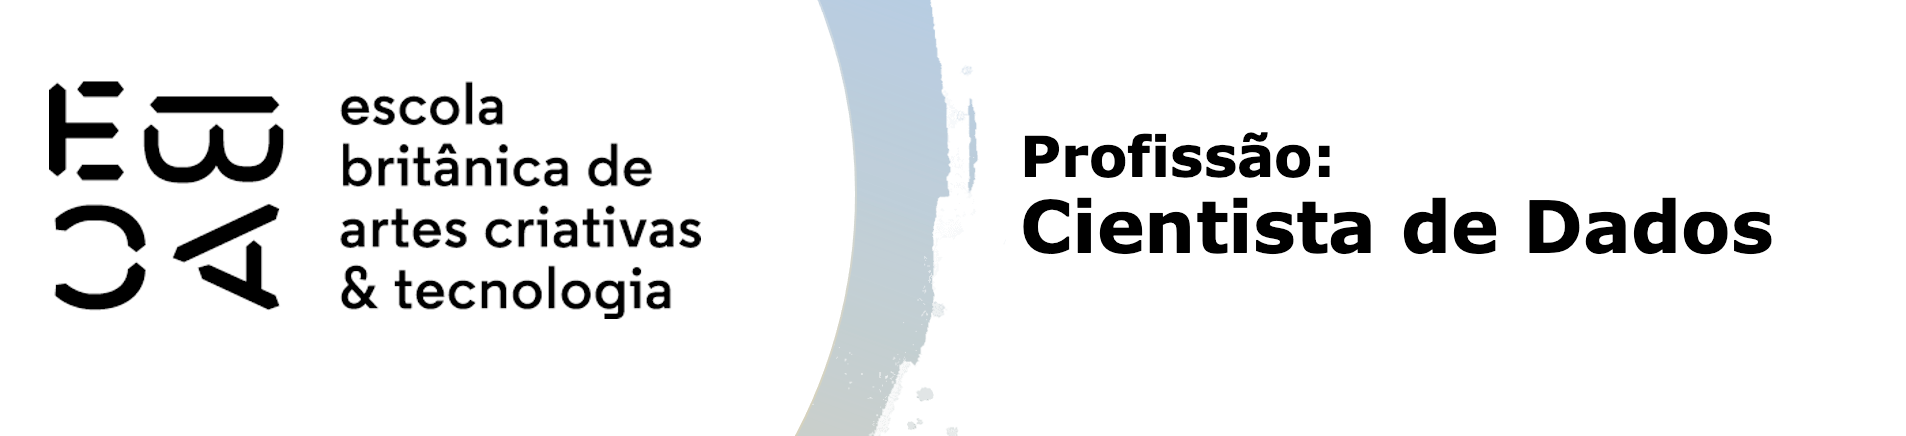

# Tarefa - Agrupamento hierárquico

Neste exercício vamos usar a base [online shoppers purchase intention](https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset) de Sakar, C.O., Polat, S.O., Katircioglu, M. et al. Neural Comput & Applic (2018). [Web Link](https://doi.org/10.1007/s00521-018-3523-0).

A base trata de registros de 12.330 sessões de acesso a páginas, cada sessão sendo de um único usuário em um período de 12 meses, para posteriormente estudarmos a relação entre o design da página e o perfil do cliente - "Será que clientes com comportamento de navegação diferentes possuem propensão a compra diferente?" 

Nosso objetivo agora é agrupar as sessões de acesso ao portal considerando o comportamento de acesso e informações da data, como a proximidade a uma data especial, fim de semana e o mês.

|Variavel                |Descrição          | 
|------------------------|:-------------------| 
|Administrative          | Quantidade de acessos em páginas administrativas| 
|Administrative_Duration | Tempo de acesso em páginas administrativas | 
|Informational           | Quantidade de acessos em páginas informativas  | 
|Informational_Duration  | Tempo de acesso em páginas informativas  | 
|ProductRelated          | Quantidade de acessos em páginas de produtos | 
|ProductRelated_Duration | Tempo de acesso em páginas de produtos | 
|BounceRates             | *Percentual de visitantes que entram no site e saem sem acionar outros *requests* durante a sessão  | 
|ExitRates               | * Soma de vezes que a página é visualizada por último em uma sessão dividido pelo total de visualizações | 
|PageValues              | * Representa o valor médio de uma página da Web que um usuário visitou antes de concluir uma transação de comércio eletrônico | 
|SpecialDay              | Indica a proximidade a uma data festiva (dia das mães etc) | 
|Month                   | Mês  | 
|OperatingSystems        | Sistema operacional do visitante | 
|Browser                 | Browser do visitante | 
|Region                  | Região | 
|TrafficType             | Tipo de tráfego                  | 
|VisitorType             | Tipo de visitante: novo ou recorrente | 
|Weekend                 | Indica final de semana | 
|Revenue                 | Indica se houve compra ou não |

\* variávels calculadas pelo google analytics

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from gower import gower_matrix

from scipy.spatial.distance  import squareform
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import fcluster

In [41]:
df = pd.read_csv('online_shoppers_intention.csv')

In [43]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [45]:
df.Revenue.value_counts(dropna=False)

Revenue
False    10422
True      1908
Name: count, dtype: int64

In [47]:
display(df.Revenue.value_counts(dropna=False).to_frame())

,count
Revenue,
False,10422
True,1908


## Análise descritiva

Faça uma análise descritiva das variáveis do escopo.

- Verifique a distribuição dessas variáveis
- Veja se há valores *missing* e caso haja, decida o que fazer
- Faça mais algum tratamento nas variáveis caso ache pertinente

In [50]:
print(f'''
Quantidade de linhas{df.shape[0]}
Quantidade de  colunas{df.shape[1]}
Quantidade de valores missing: {df.isna().sum().sum}''')

df.info()
display(df.describe())


Quantidade de linhas12330
Quantidade de  colunas18
Quantidade de valores missing: <bound method Series.sum of Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational          

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [52]:
df_sem_object= df.select_dtypes(exclude=['object'])

In [54]:
df_sem_object.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  OperatingSystems         12330 non-null  int64  
 11  Browser                  12330 non-null  int64  
 12  Region                   12330 non-null  int64  
 13  TrafficType              12330 non-null  int64  
 14  Weekend               

<Axes: >

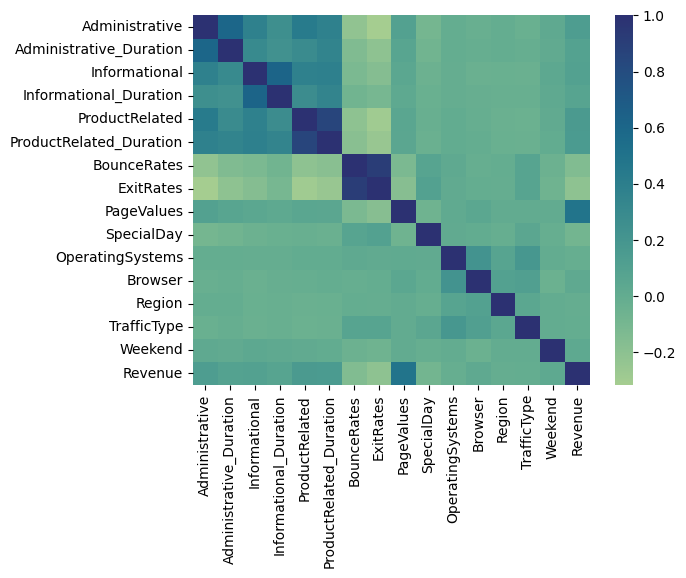

In [56]:
sns.heatmap(df_sem_object.corr(), cmap='crest')

## Variáveis de agrupamento

Liste as variáveis que você vai querer utilizar. Essa é uma atividade importante do projeto, e tipicamente não a recebemos pronta. Não há resposta pronta ou correta, mas apenas critérios e a sua decisão. Os critérios são os seguintes:

- Selecione para o agrupamento variáveis que descrevam o padrão de navegação na sessão.
- Selecione variáveis que indiquem a característica da data.
- Não se esqueça de que você vai precisar realizar um tratamento especial para variáveis qualitativas.
- Trate adequadamente valores faltantes.

In [77]:
session_navigation_pattern= ['Administrative',
                             'Informational',
                             'ProductRelated',
                             'PageValues',
                             'OperatingSystems',
                             'Browser',
                             'TrafficType']
(df[session_navigation_pattern]
 .dtypes
 .reset_index()
 .rename(columns={'index':'Variavel (session_navigation_pattern)',
                  0:'Tipo'})
)

,Variavel (session_navigation_pattern),Tipo
0,Administrative,int64
1,Informational,int64
2,ProductRelated,int64
3,PageValues,float64
4,OperatingSystems,int64
5,Browser,int64
6,TrafficType,int64


In [80]:
temporal_indicators= ['SpecialDay', 'Month', 'Weekend']

(df[temporal_indicators]
 .dtypes
 .reset_index()
 .rename(columns={'index':'Variavel (temporal_indicators)',
                  0: 'Tipo'})
)

,Variavel (temporal_indicators),Tipo
0,SpecialDay,float64
1,Month,object
2,Weekend,bool


In [86]:
numerical = ['ProductRelated', 'PageValues', 'SpecialDay']

df_ = df[session_navigation_pattern + temporal_indicators]
df_cat = df_.drop(columns=numerical)

print('Variáveis Categóricas e seus Valores Únicos:')
[f'{cat}: {df[cat].unique()}' for cat in df_cat]

Variáveis Categóricas e seus Valores Únicos:


['Administrative: [ 0  1  2  4 12  3 10  6  5  9  8 16 13 11  7 18 14 17 19 15 24 22 21 20\n 23 27 26]',
 'Informational: [ 0  1  2  4 16  5  3 14  6 12  7  9 10  8 11 24 13]',
 'OperatingSystems: [1 2 4 3 7 6 8 5]',
 'Browser: [ 1  2  3  4  5  6  7 10  8  9 12 13 11]',
 'TrafficType: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 18 19 16 17 20]',
 "Month: ['Feb' 'Mar' 'May' 'Oct' 'June' 'Jul' 'Aug' 'Nov' 'Sep' 'Dec']",
 'Weekend: [False  True]']

In [93]:
df_dummies= pd.get_dummies(data= df_, drop_first= False)
categorical_features= df_dummies.drop(columns= numerical).columns.values
cat_features= [True if column in categorical_features else False for column in df_dummies]

(df_dummies
 .dtypes
 .reset_index()
 .rename(columns= {'index': 'Variavel',
                   0: 'Tipo'})
 .assign(Categorical=cat_features)
)

,Variavel,Tipo,Categorical
0,Administrative,int64,True
1,Informational,int64,True
2,ProductRelated,int64,False
3,PageValues,float64,False
4,OperatingSystems,int64,True
5,Browser,int64,True
6,TrafficType,int64,True
7,SpecialDay,float64,False
8,Weekend,bool,True
9,Month_Aug,bool,True


## Número de grupos

Nesta atividade vamos adotar uma abordagem bem pragmática e avaliar agrupamentos hierárquicos com 3 e 4 grupos, por estarem bem alinhados com uma expectativa e estratégia do diretor da empresa. 

*Atenção*: Cuidado se quiser fazer o dendrograma, pois com muitas observações ele pode ser mais complicado de fazer, e dependendo de como for o comando, ele pode travar o *kernell* do seu python.

In [96]:
%%time
dist_gower= gower_matrix(data_x= df_dummies, cat_features= cat_features)

pd.DataFrame(dist_gower)

CPU times: user 57.2 s, sys: 864 ms, total: 58 s
Wall time: 58 s


,0,1,2,3,4,5,6,7,8,9,...,12320,12321,12322,12323,12324,12325,12326,12327,12328,12329
0,0.000000,0.157969,0.105263,0.157969,0.211198,0.159239,0.178947,0.210601,0.200075,0.179097,...,0.211049,0.158268,0.317357,0.319000,0.264278,0.321453,0.316088,0.316163,0.316835,0.315939
1,0.157969,0.000000,0.157969,0.105263,0.211124,0.053901,0.126390,0.210676,0.094737,0.073759,...,0.158343,0.263457,0.159388,0.213662,0.211571,0.374009,0.263382,0.263457,0.211497,0.210601
2,0.105263,0.157969,0.000000,0.157969,0.211198,0.106607,0.126316,0.263233,0.147443,0.179097,...,0.263680,0.263531,0.317357,0.319000,0.316909,0.321453,0.316088,0.316163,0.316835,0.315939
3,0.157969,0.105263,0.157969,0.000000,0.105860,0.106532,0.179022,0.210676,0.147368,0.179022,...,0.210974,0.263457,0.264651,0.266293,0.264203,0.374009,0.210750,0.210825,0.264128,0.210601
4,0.211198,0.211124,0.211198,0.105860,0.000000,0.211198,0.232251,0.211273,0.253229,0.232102,...,0.315939,0.316088,0.369317,0.370959,0.368869,0.320781,0.210900,0.210825,0.368794,0.211049
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,0.321453,0.374009,0.321453,0.374009,0.320781,0.372740,0.395137,0.321527,0.416115,0.394987,...,0.320930,0.321079,0.267253,0.370874,0.372964,0.000000,0.321154,0.321079,0.373039,0.321303
12326,0.316088,0.263382,0.316088,0.210750,0.210900,0.264203,0.337141,0.263531,0.305487,0.336991,...,0.158119,0.210601,0.317059,0.213438,0.211348,0.321154,0.000000,0.052706,0.211273,0.052781
12327,0.316163,0.263457,0.316163,0.210825,0.210825,0.264128,0.337215,0.263606,0.305562,0.337066,...,0.158044,0.210526,0.316984,0.213363,0.211273,0.321079,0.052706,0.000000,0.211198,0.052856
12328,0.316835,0.211497,0.316835,0.264128,0.368794,0.210825,0.285256,0.316909,0.253602,0.285106,...,0.105786,0.211198,0.211049,0.107428,0.157969,0.373039,0.211273,0.211198,0.000000,0.211422


In [112]:
%%time

gdv = squareform(X= dist_gower, force= 'tovector')
Z = linkage(y= gdv, method= 'complete')

pd.DataFrame(data= Z, columns=['id1', 'id2', 'dist', 'n'])

CPU times: user 1.61 s, sys: 129 ms, total: 1.74 s
Wall time: 1.77 s


,id1,id2,dist,n
0,166.0,167.0,0.000000,2.0
1,64.0,140.0,0.000000,2.0
2,143.0,12331.0,0.000000,3.0
3,10.0,87.0,0.000000,2.0
4,60.0,163.0,0.000000,2.0
...,...,...,...,...
12324,24640.0,24653.0,0.485998,4398.0
12325,24646.0,24651.0,0.488647,4386.0
12326,24654.0,24655.0,0.499902,8784.0
12327,24643.0,24652.0,0.515826,3546.0



3 grupos:
dendrogram.icoord: 123
dendrogram.dcoord: 123
dendrogram.ivl: 124
dendrogram.leaves: 124
dendrogram.color_list: 123
dendrogram.leaves_color_list: 124

4 grupos:
dendrogram.icoord: 123
dendrogram.dcoord: 123
dendrogram.ivl: 124
dendrogram.leaves: 124
dendrogram.color_list: 123
dendrogram.leaves_color_list: 124


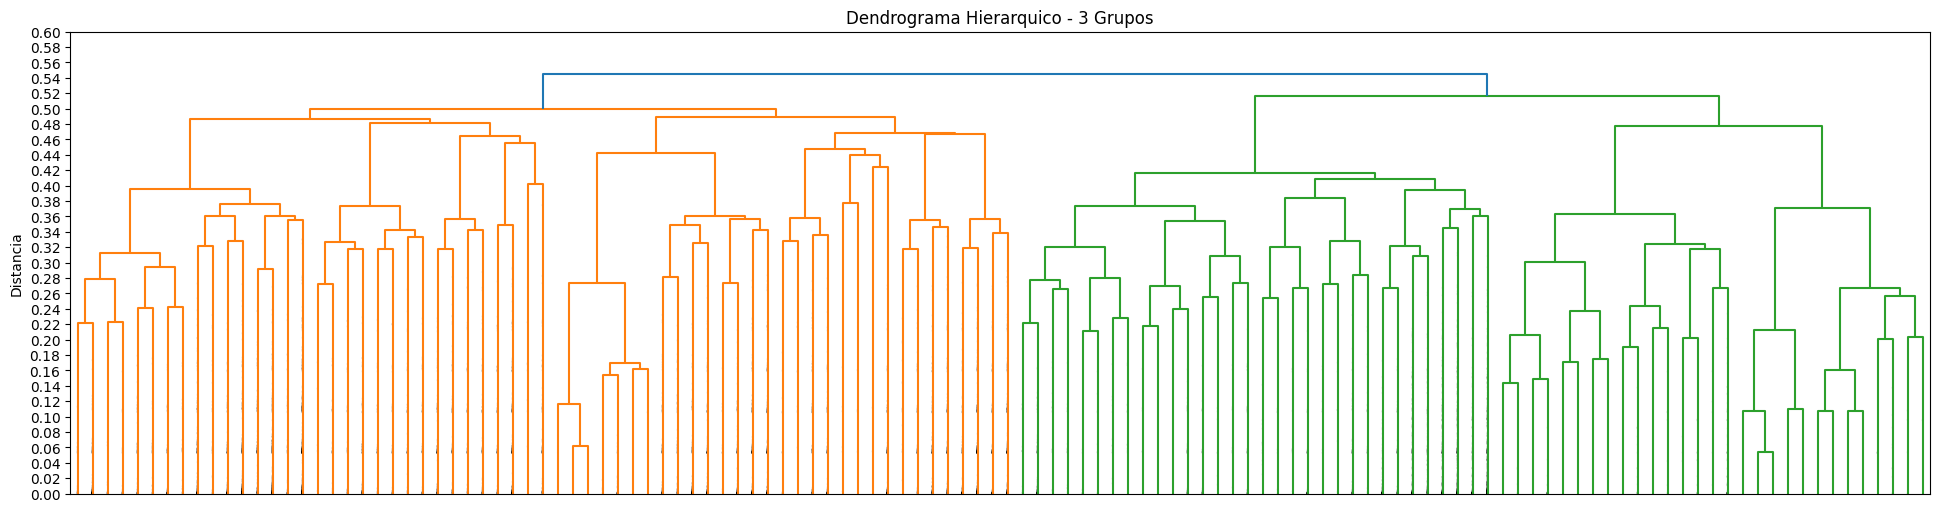

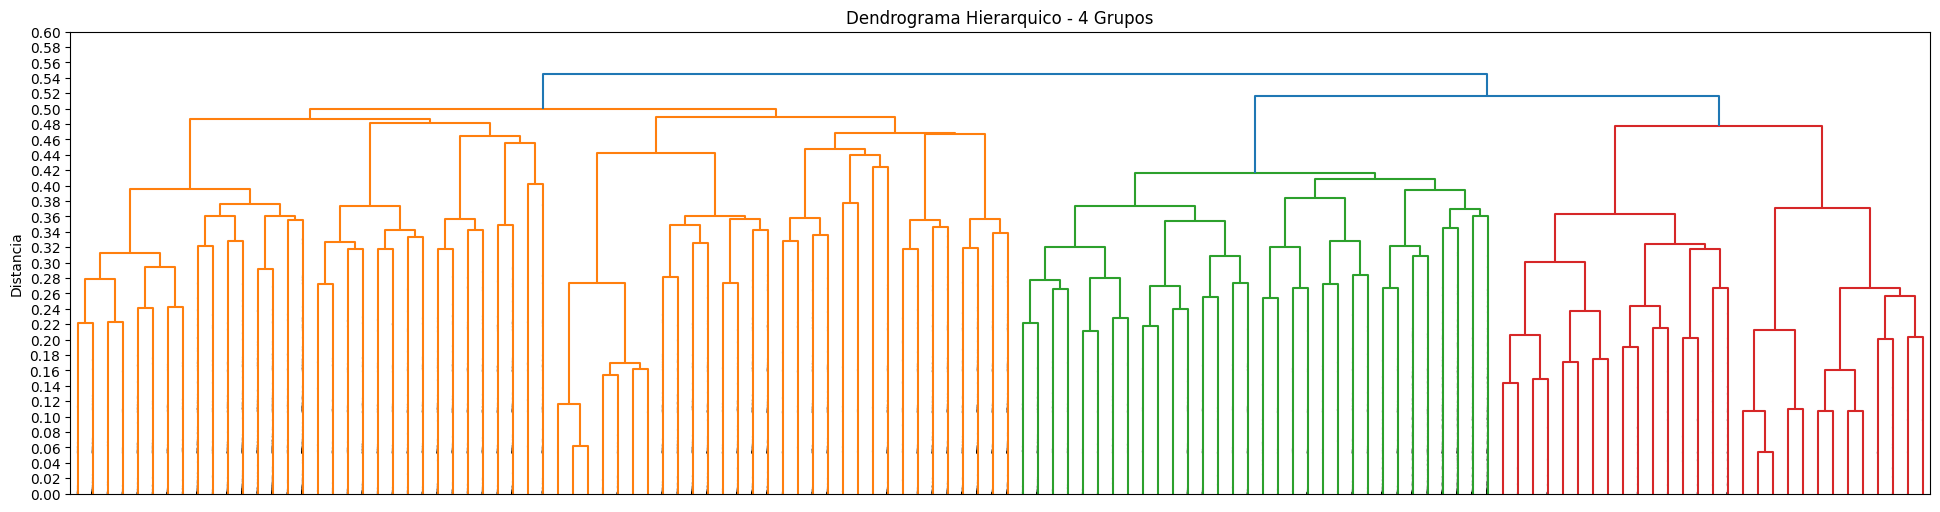

CPU times: user 3.24 s, sys: 49 ms, total: 3.29 s
Wall time: 2.2 s


In [122]:
%%time

def dn(color_threshold: float, num_groups: int) -> None:
    plt.figure(figsize=(24, 6))
    plt.ylabel(ylabel= 'Distancia')
    plt.title(f'Dendrograma Hierarquico - {num_groups} Grupos')

    dn= dendrogram(Z= Z,
                   p= 6,
                   truncate_mode='level',
                   color_threshold=color_threshold,
                   show_leaf_counts=True,
                   leaf_font_size=8,
                   leaf_rotation=45,
                   show_contracted=True)
    plt.yticks(np.linspace(0, .6, num=31))
    plt.xticks([])

    for i in dn.keys():
        print(f'dendrogram.{i}: {len(dn[i])}')

for qtd, color_threshold in [(3, .53), (4, .5)]:
    print(f'\n{qtd} grupos:')
    dn(color_threshold, qtd)

plt.show()

## Avaliação dos grupos

Construa os agrupamentos com a técnica adequada que vimos em aula. Não se esqueça de tratar variáveis qualitativas, padronizar escalas das quantitativas, tratar valores faltantes e utilizar a distância correta.

Faça uma análise descritiva para pelo menos duas soluções de agrupamentos (duas quantidades diferentes de grupos) sugeridas no item anterior, utilizando as variáveis que estão no escopo do agrupamento.
- Com base nesta análise e nas análises anteriores, decida pelo agrupamento final. 
- Se puder, sugira nomes para os grupos.

In [124]:
df['grupo_3'] = fcluster(Z= Z, t= 3, criterion= 'maxclust')

(pd.DataFrame({'Grupo': df.grupo_3.value_counts().index,
              'Quantidade': df.grupo_3.value_counts().values})
 .set_index('Grupo'))

,Quantidade
Grupo,
1,8784
2,3327
3,219


In [130]:
(pd.crosstab(index=df.VisitorType,
             columns=[df.grupo_3, df.Revenue],
             normalize='index')
 .apply(lambda x: x.map(lambda val: f'{val*100:.0f} %')))  

grupo_3               1           2           3      
Revenue           False True  False True  False True 
VisitorType                                          
New_Visitor        61 %  20 %  13 %   5 %   1 %   0 %
Other              81 %  19 %   0 %   0 %   0 %   0 %
Returning_Visitor  58 %  11 %  26 %   3 %   2 %   0 %

In [154]:
(pd.crosstab(index=df.Revenue,
             columns=df.grupo_3,
             normalize='index')
 .apply(lambda x: x.map(lambda val: f'{val*100:.0f} %'))
 .rename(columns={1: '1(Returning_Visitor)',
                 2: '2(New_Visitor)',
                 3: '3(Other)'}) 
)

grupo_3,1(Returning_Visitor),2(New_Visitor),3(Other)
Revenue,,,
False,70 %,28 %,2 %
True,81 %,19 %,0 %


In [159]:
df['grupo_4'] = fcluster(Z= Z, t=4, criterion= 'maxclust')

(pd.DataFrame({'Grupo': df.grupo_4.value_counts().index,
               'Quantidade': df.grupo_4.value_counts().values})
 .set_index('Grupo')
 .sort_index()
)

,Quantidade
Grupo,
1,4398
2,4386
3,3327
4,219


In [162]:
(pd.crosstab(index=df.Month,
             columns=[df.grupo_4, df.Revenue],
             normalize='columns')
 .apply(lambda x: x.map(lambda val: f'{val*100:.0f} %')))  

grupo_4     1           2            3            4      
Revenue False True  False True   False  True  False True 
Month                                                    
Aug      10 %   7 %   0 %   0 %    0 %    0 %   0 %   0 %
Dec       0 %   0 %  39 %  40 %    0 %    0 %   0 %   0 %
Feb       0 %   0 %   0 %   0 %    0 %    0 %  83 %  75 %
Jul      11 %   6 %   0 %   1 %    0 %    0 %   0 %   0 %
June      0 %   0 %   7 %   5 %    0 %    0 %   0 %   0 %
Mar       0 %   0 %  45 %  35 %    0 %    0 %   0 %   0 %
May       0 %   0 %   0 %   0 %  100 %  100 %  17 %  25 %
Nov      66 %  76 %   0 %   0 %    0 %    0 %   0 %   0 %
Oct       2 %   2 %   9 %  18 %    0 %    0 %   0 %   0 %
Sep      11 %   9 %   0 %   0 %    0 %    0 %   0 %   0 %

In [164]:
(pd.crosstab(index=[df.Revenue, df.VisitorType, df.SpecialDay],
             columns=df.grupo_4,
             normalize='index')
 .apply(lambda x: x.map(lambda val: f'{val*100:.0f} %'))
 .rename(columns={1: '1(Returning_Visitor - SpecialDay 0)',
                  2: '2(Returning_Visitor - SpecialDay 1)',
                  3: '3(New_Visitor)',
                  4: '4(Other)'}) 
)

grupo_4                              1(Returning_Visitor - SpecialDay 0)  \
Revenue VisitorType       SpecialDay                                       
False   New_Visitor       0.0                                       38 %   
                          0.2                                        0 %   
                          0.4                                        0 %   
                          0.6                                        0 %   
                          0.8                                        0 %   
                          1.0                                        0 %   
        Other             0.0                                       23 %   
        Returning_Visitor 0.0                                       37 %   
                          0.2                                        0 %   
                          0.4                                        0 %   
                          0.6                                        0 %   
                          0.8                                        0 %   
                          1.0                                        0 %   
True    New_Visitor       0.0                                       47 %   
                          0.2                                        0 %   
                          0.4                                        0 %   
                          0.6                                        0 %   
                          0.8                                        0 %   
                          1.0                                        0 %   
        Other             0.0                                       12 %   
        Returning_Visitor 0.0                                       57 %   
                          0.2                                        0 %   
                          0.4                                        0 %   
                          0.6                                        0 %   
                          0.8                                        0 %   
                          1.0                                        0 %   

grupo_4                              2(Returning_Visitor - SpecialDay 1)  \
Revenue VisitorType       SpecialDay                                       
False   New_Visitor       0.0                                       46 %   
                          0.2                                        0 %   
                          0.4                                        0 %   
                          0.6                                        0 %   
                          0.8                                        0 %   
                          1.0                                        0 %   
        Other             0.0                                       77 %   
        Returning_Visitor 0.0                                       41 %   
                          0.2                                        0 %   
                          0.4                                        0 %   
                          0.6                                        0 %   
                          0.8                                        0 %   
                          1.0                                        0 %   
True    New_Visitor       0.0                                       36 %   
                          0.2                                        0 %   
                          0.4                                        0 %   
                          0.6                                        0 %   
                          0.8                                        0 %   
                          1.0                                        0 %   
        Other             0.0                                       88 %   
        Returning_Visitor 0.0                                       27 %   
                          0.2                                        0 %   
                          0.4                  

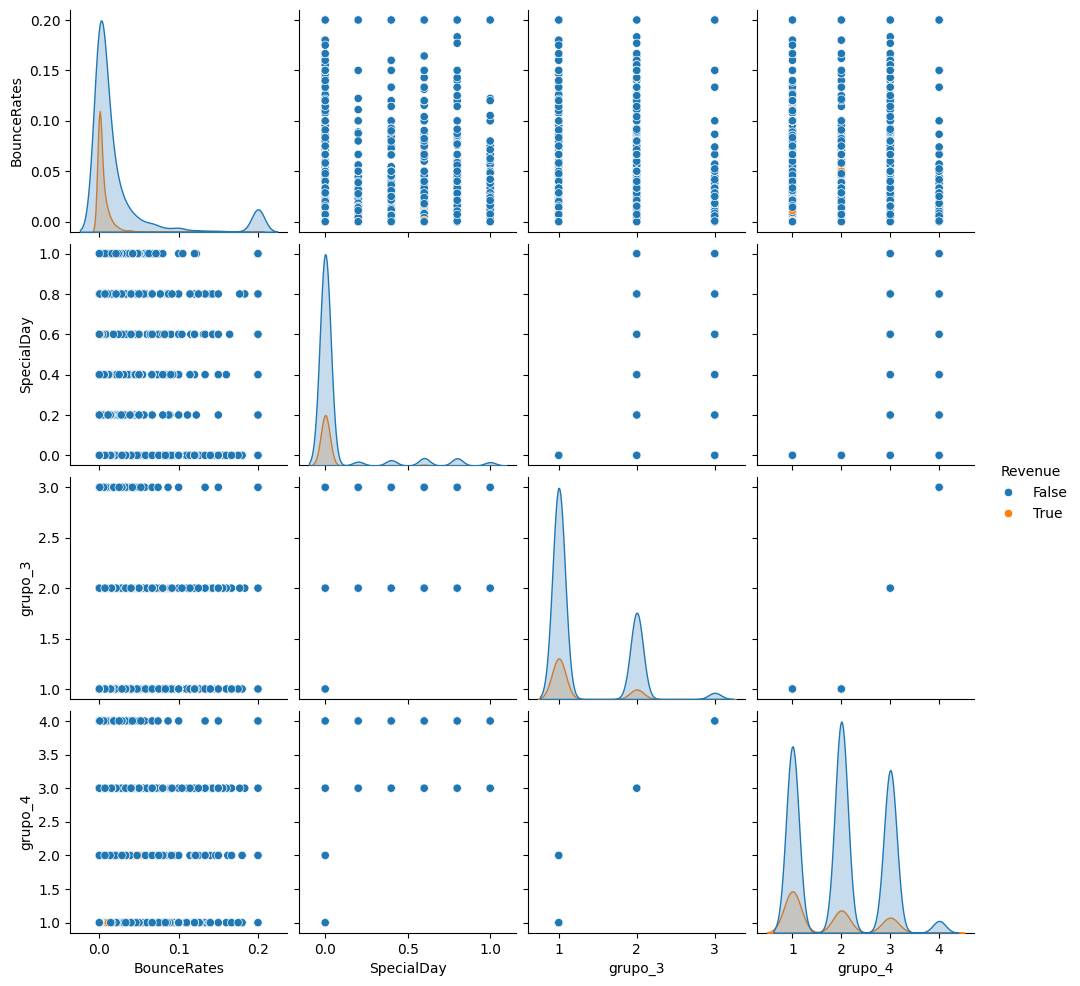

In [166]:
sns.pairplot(data= df[['BounceRates', 'Revenue', 'SpecialDay', 'grupo_3', 'grupo_4']], hue='Revenue')

plt.show()

## Avaliação de resultados

Avalie os grupos obtidos com relação às variáveis fora do escopo da análise (minimamente *bounce rate* e *revenue*). 
- Qual grupo possui clientes mais propensos à compra?

Com base no tempo gasto no site e no comportamento de navegação, dados mostram que visitantes recorrentes (Grupo 1) são os mais propensos à compra.